<a href="https://colab.research.google.com/github/avanegasp/Proyecto_Final_Ucataluna/blob/main/Proyecto_Final_UCatalu%C3%B1a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [246]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [247]:
viviendas = pd.read_csv('https://raw.githubusercontent.com/avanegasp/Alura/main/inmuebles_bogota.csv')

In [248]:
copy_ind = viviendas.copy()

In [249]:
viviendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Baños         9520 non-null   int64 
 4   Área          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
dtypes: int64(3), object(5)
memory usage: 595.1+ KB


In [250]:
#Cambio el nombre de Baños y Área
columnas = {'Baños' : 'Banos', 'Área' : 'Area_m2'}
viviendas = viviendas.rename(columns = columnas)

In [251]:
viviendas.describe(include='object')

,Tipo,Descripcion,Barrio,UPZ,Valor
count,9520,9520,9520,9478,9520
unique,8,316,149,63,1039
top,Apartamento,Apartamento en venta en Usaquén,Usaquén,Usaquén,$ 450.000.000
freq,7327,916,1105,1681,128


In [252]:
columnas = {'UPZ':'UPL'}
viviendas = viviendas.rename(columns=columnas)

In [253]:
viviendas.columns

Index(['Tipo', 'Descripcion', 'Habitaciones', 'Banos', 'Area_m2', 'Barrio',
       'UPL', 'Valor'],
      dtype='object')

In [254]:
viviendas.sample(5)

,Tipo,Descripcion,Habitaciones,Banos,Area_m2,Barrio,UPL,Valor
9254,Apartamento,Apartamento en venta en Ciudad Bolívar,3,2,52,Ciudad Bolívar,CIUDAD BOLÍVAR: Monteblanco + El Tesoro + El M...,$ 170.000.000
6421,Apartamento,Apartamento en venta en Colina Campestre,3,3,94,Colina Campestre,Niza,$ 520.000.000
3253,Apartamento,Apartamento en venta en Usaquén,3,2,80,Usaquén,Usaquén,$ 320.000.000
4131,Apartamento,Apartamento en venta en Palermo,2,2,77,Palermo,Galerías,$ 462.000.000
1870,Apartamento,Apartamento en venta en Barrios Unidos,3,2,89,Barrios Unidos,Los Andes,$ 398.800.000


In [255]:
viviendas.describe()

,Habitaciones,Banos,Area_m2
count,9520.000000,9520.000000,9520.000000
mean,3.072479,2.447899,146.664706
std,2.049856,1.255314,1731.379622
min,1.000000,0.000000,2.000000
25%,2.000000,2.000000,57.000000
50%,3.000000,2.000000,80.000000
75%,3.000000,3.000000,135.000000
max,110.000000,9.000000,166243.000000


Se puede observar que hay que confirmar los datos máximos de habitaciones, área y mínimo de Baños

In [256]:
max_habi = viviendas.loc[viviendas['Habitaciones'] >= 110]
max_habi

,Tipo,Descripcion,Habitaciones,Banos,Area_m2,Barrio,UPL,Valor
897,Casa,Casa en venta en La Uribe,110,2,110,La Uribe,Usaquén,$ 480.000.000


## Analisis Univariado

#### Habitaciones

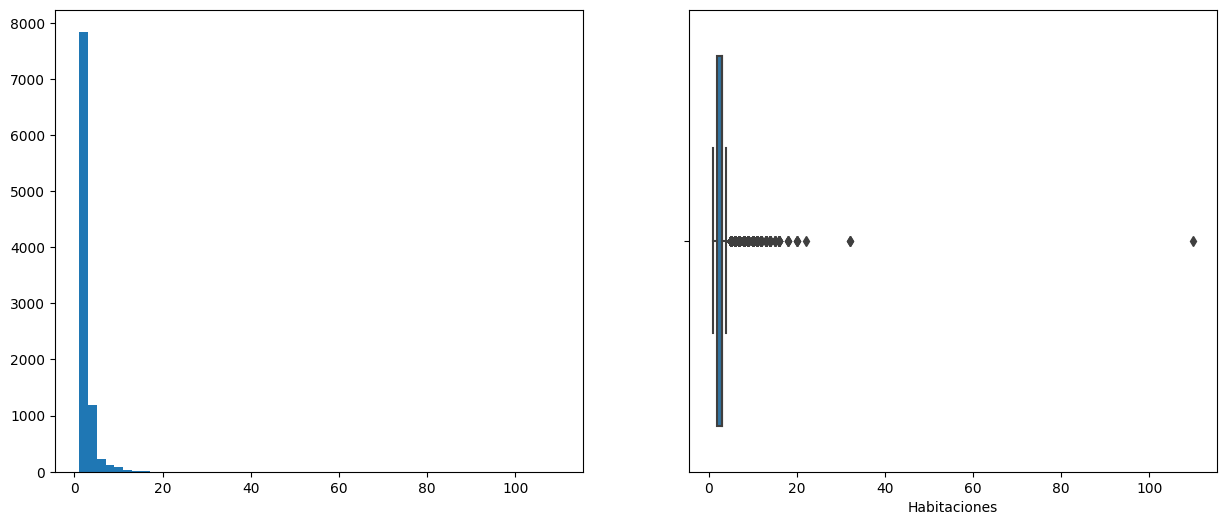

In [257]:
fig, axes = plt.subplots (1,2, figsize = (15,6))
#Frecuencia
axes[0].hist(viviendas['Habitaciones'], bins=54)

#Distribución
sns.boxplot(x=viviendas['Habitaciones'], ax=axes[1])

plt.show()

In [258]:
habi_15 = viviendas.loc[viviendas['Habitaciones']>15]
habi_15.count()

Tipo            19
Descripcion     19
Habitaciones    19
Banos           19
Area_m2         19
Barrio          19
UPL             19
Valor           19
dtype: int64

### UPL

In [259]:
viv_sort = viviendas['UPL'].value_counts()
viv_sort

Usaquén                                  1681
CHAPINERO: Pardo Rubio + Chapinero       1274
USAQUÉN: Country Club + Santa Bárbara     771
Bosa Central                              591
Kennedy Central                           589
                                         ... 
Localidad Usme resto                        2
Las Cruces                                  2
La Macarena                                 1
Fontibón San Pablo                          1
Zona Franca                                 1
Name: UPL, Length: 63, dtype: int64

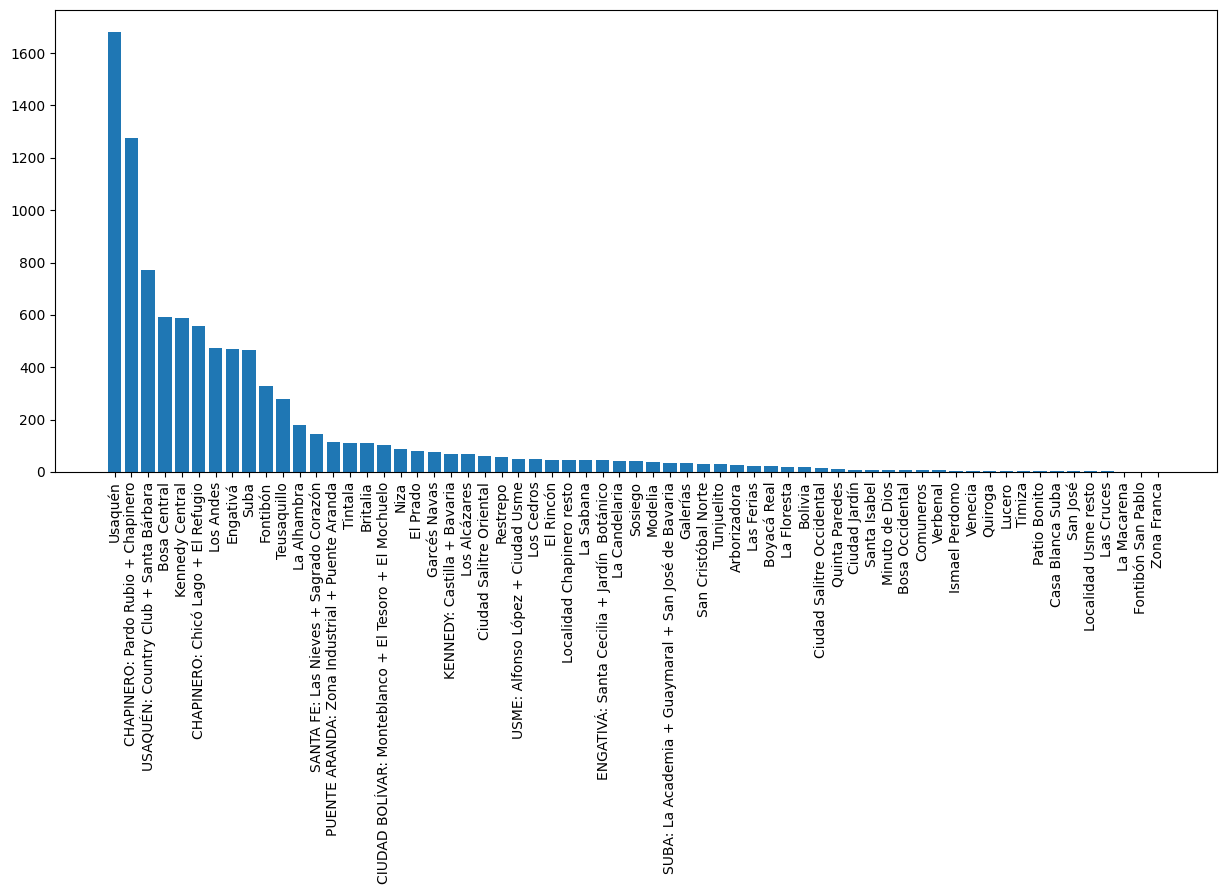

In [260]:
plt.figure(figsize=(15,6))
plt.bar(viv_sort.index, viv_sort.values)
plt.xticks(rotation=90)
plt.show()

### Barrios

In [261]:
barrios = viviendas['Barrio'].value_counts()
barrios

Usaquén               1105
Zona Noroccidental     877
Bosa                   589
Kennedy                589
Cedritos               554
                      ... 
Colinas De Suba          1
La Estanzuela            1
Roma                     1
Alameda                  1
Prado Veraniego          1
Name: Barrio, Length: 149, dtype: int64

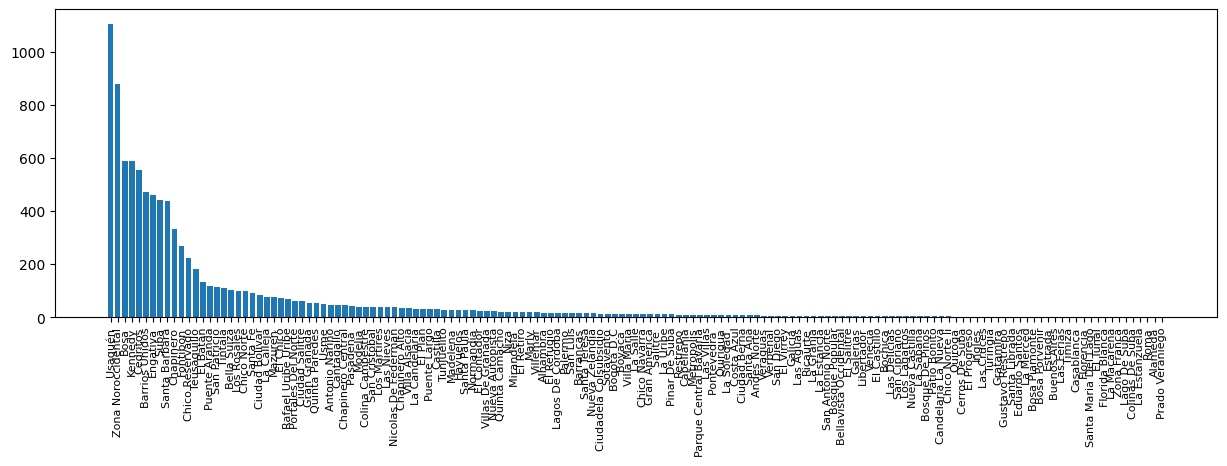

In [262]:
plt.figure(figsize=(15,4))
plt.bar(barrios.index, barrios.values)
plt.xticks(rotation=90, fontsize=8)
plt.show()

### Analisis de datos atípicos

In [263]:
precio = viviendas['Valor']
precio

0         $ 360.000.000
1         $ 670.000.000
2       $ 1.120.000.000
3         $ 890.000.000
4         $ 970.000.000
             ...       
9515      $ 290.000.000
9516      $ 670.000.000
9517      $ 900.000.000
9518      $ 335.000.000
9519      $ 144.990.000
Name: Valor, Length: 9520, dtype: object

### Viviendas con 1 habitación

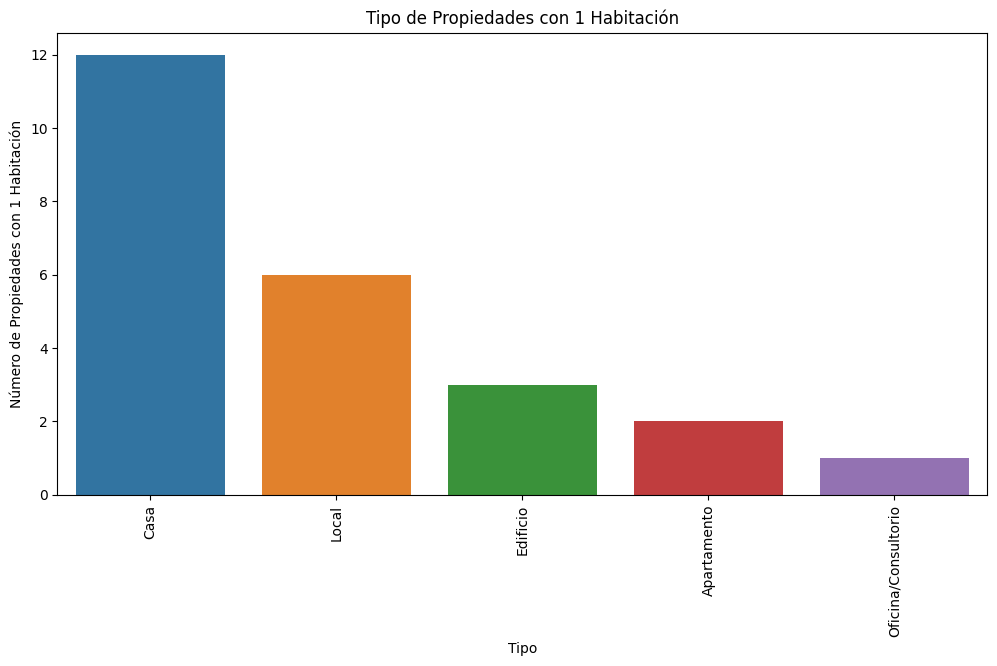

In [264]:
min_habi = viviendas.loc[viviendas['Habitaciones'] >= 15]
conteo = min_habi['Tipo'].value_counts()

# Crea un gráfico de barras
plt.figure(figsize=(12, 6))  # Ajusta el tamaño de la figura si es necesario
sns.barplot(x=conteo.index, y=conteo.values)
plt.xlabel("Tipo")
plt.ylabel("Número de Propiedades con 1 Habitación")
plt.title("Tipo de Propiedades con 1 Habitación")
plt.xticks(rotation=90)  # Rota las etiquetas del eje x para una mejor visualización
plt.show()

In [265]:
habi = viviendas.loc[viviendas['Habitaciones'] >= 15]
habi['Tipo'].value_counts()

Casa                   12
Local                   6
Edificio                3
Apartamento             2
Oficina/Consultorio     1
Name: Tipo, dtype: int64

In [266]:
habi_box = viviendas.loc[viviendas['Habitaciones'] <= 110]
habi_box['Tipo'].value_counts()

Apartamento            7327
Casa                   2043
Oficina/Consultorio      60
Local                    38
Edificio                 22
Bodega                   13
Finca                    11
Lote                      6
Name: Tipo, dtype: int64

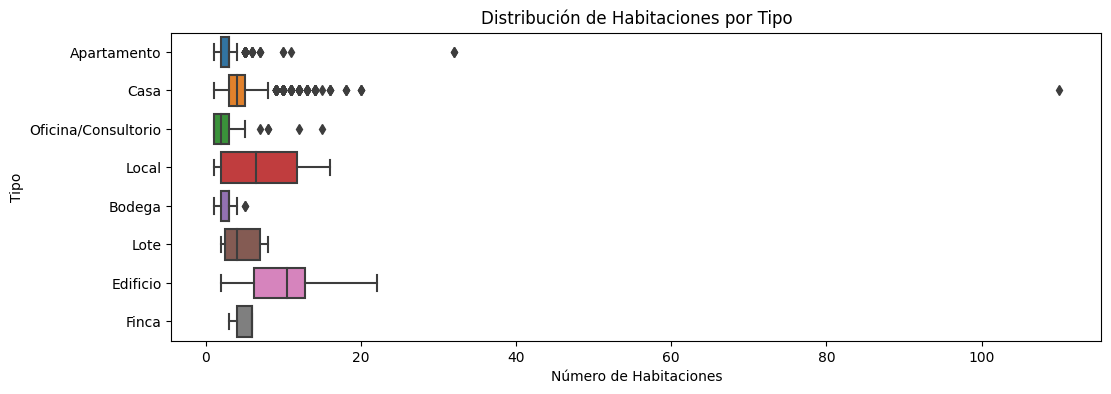

In [267]:
plt.figure(figsize=(12,4))
sns.boxplot(x=habi_box['Habitaciones'], y=habi_box['Tipo'])
plt.ylabel("Tipo")
plt.xlabel("Número de Habitaciones")
plt.title("Distribución de Habitaciones por Tipo")
plt.show()

Una casa tiene más de 100 habitaciones

### Viviendas con áreas mayores a 13000 m2

In [268]:
max_area = viviendas.loc[viviendas['Area_m2'] >= 13000]
max_area

,Tipo,Descripcion,Habitaciones,Banos,Area_m2,Barrio,UPL,Valor
3807,Apartamento,Apartamento en venta en Chapinero,3,5,15920,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,$ 1.250.000.000
6388,Apartamento,Apartamento en venta en Chapinero,3,5,15920,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,$ 1.250.000.000
7073,Casa,Casa en venta en Modelia,4,3,166243,Modelia,Fontibón,$ 850.000.000


In [269]:
min_area = viviendas.loc[viviendas['Area_m2'] <= 10]
min_area

,Tipo,Descripcion,Habitaciones,Banos,Area_m2,Barrio,UPL,Valor
8401,Apartamento,Apartamento en venta en San Cristobal,3,1,2,San Cristobal,Sosiego,$ 180.000.000
9256,Apartamento,Apartamento en venta en Rafael Uribe Uribe,2,1,5,Rafael Uribe Uribe,Los Alcázares,$ 200.000.000


### Viviendas con 0 baños

In [270]:
max_banos = viviendas.loc[viviendas['Banos'] == 0]
max_banos

,Tipo,Descripcion,Habitaciones,Banos,Area_m2,Barrio,UPL,Valor
2910,Edificio,Edificio en venta en Santa Barbara,22,0,1080,Santa Barbara,USAQUÉN: Country Club + Santa Bárbara,$ 9.200.000.000
8193,Casa,Casa en venta en Puente Aranda,15,0,450,Puente Aranda,PUENTE ARANDA: Zona Industrial + Puente Aranda,$ 1.000.000.000
9451,Casa,Casa en venta en Bosa,10,0,540,Bosa,Bosa Central,$ 800.000.000


## Imputaciones

In [271]:
viviendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Banos         9520 non-null   int64 
 4   Area_m2       9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPL           9478 non-null   object
 7   Valor         9520 non-null   object
dtypes: int64(3), object(5)
memory usage: 595.1+ KB


In [272]:
viviendas_null = viviendas['UPL'].isnull().sum()
viviendas_null

42

#### Eliminación de los null en las filas

In [273]:
#Hay 42 datos nulos perteneciente a 1 columnas
viviendas.isnull().sum(axis = 0).value_counts()

0     7
42    1
dtype: int64

In [274]:
#La columna que contiene los nulos
columnas_con_nulos = viviendas.columns[viviendas.isnull().any()]
print(columnas_con_nulos)

Index(['UPL'], dtype='object')


Se revisa que falta solo 1 datos en 42 filas, son UPL.

In [275]:
# Probar eliminando todos los null de las columnas
viviendas_1 = viviendas.dropna(axis=0)

#risk_2.isnull().sum().sort_values(ascending = False)
print(viviendas.shape)
print(viviendas_1.shape)

(9520, 8)
(9478, 8)


In [276]:
viviendas_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9478 entries, 0 to 9519
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9478 non-null   object
 1   Descripcion   9478 non-null   object
 2   Habitaciones  9478 non-null   int64 
 3   Banos         9478 non-null   int64 
 4   Area_m2       9478 non-null   int64 
 5   Barrio        9478 non-null   object
 6   UPL           9478 non-null   object
 7   Valor         9478 non-null   object
dtypes: int64(3), object(5)
memory usage: 666.4+ KB


Se eliminan las filas con valores nulos

In [277]:
#Criterio para saber la perdida de data al borrar por filas
(viviendas.size - viviendas_1.size)*100/viviendas.size

0.4411764705882353

Con esta eliminación solo se borra un 4% de la data

---



#### Eliminación de los null en columnas

In [278]:
#Hay 42 datos nulos en 1 columna
viviendas.isnull().sum(axis = 1).value_counts()

0    9478
1      42
dtype: int64

In [279]:
# Probar eliminando todos los null de las columnas
viviendas_2 = viviendas.dropna(axis=1)

#risk_2.isnull().sum().sort_values(ascending = False)
print(viviendas.shape)
print(viviendas_2.shape)

(9520, 8)
(9520, 7)


In [280]:
#Criterio para saber la perdida de data al borrar por columnas
(viviendas.size - viviendas_2.size)*100/viviendas.size

12.5

Con esta eliminación se borra un 12% de la data, cantidad importante


### Imputación con la moda correspondiente

In [281]:
viviendas_4 = viviendas

In [282]:
#Se trabajará en base a estos datos null por cada columna
viviendas_3 = viviendas.isnull().sum().sort_values(ascending = False)
viviendas_3

UPL             42
Tipo             0
Descripcion      0
Habitaciones     0
Banos            0
Area_m2          0
Barrio           0
Valor            0
dtype: int64

In [283]:
moda = viviendas['UPL'].value_counts()
moda

Usaquén                                  1681
CHAPINERO: Pardo Rubio + Chapinero       1274
USAQUÉN: Country Club + Santa Bárbara     771
Bosa Central                              591
Kennedy Central                           589
                                         ... 
Localidad Usme resto                        2
Las Cruces                                  2
La Macarena                                 1
Fontibón San Pablo                          1
Zona Franca                                 1
Name: UPL, Length: 63, dtype: int64

In [284]:
type(moda)

pandas.core.series.Series

In [285]:
valor_modal = moda.index[0:6]
valor_modal

Index(['Usaquén', 'CHAPINERO: Pardo Rubio + Chapinero',
       'USAQUÉN: Country Club + Santa Bárbara', 'Bosa Central',
       'Kennedy Central', 'CHAPINERO: Chicó Lago + El Refugio'],
      dtype='object')

In [286]:
frecuencia_modal = moda.iloc[0:6]
frecuencia_modal

Usaquén                                  1681
CHAPINERO: Pardo Rubio + Chapinero       1274
USAQUÉN: Country Club + Santa Bárbara     771
Bosa Central                              591
Kennedy Central                           589
CHAPINERO: Chicó Lago + El Refugio        557
Name: UPL, dtype: int64

En base a los anteriores datos se toma la desición de hacer la imputación al valor que más datos tiene, es la UPL 'Usaquen'

In [287]:
viviendas_4['UPL'].isnull().value_counts()

False    9478
True       42
Name: UPL, dtype: int64

In [288]:
viviendas_4['UPL'] = viviendas['UPL'].fillna(value = 'Usaquén')

In [289]:
viviendas_4['UPL'].isnull().value_counts()

False    9520
Name: UPL, dtype: int64

In [290]:
viviendas_4['UPL'].sample(10)

4802       CHAPINERO: Pardo Rubio + Chapinero
1383                          Kennedy Central
1025    USAQUÉN: Country Club + Santa Bárbara
2231    USAQUÉN: Country Club + Santa Bárbara
7430       CHAPINERO: Pardo Rubio + Chapinero
2728                                Comuneros
451     USAQUÉN: Country Club + Santa Bárbara
5429                             Bosa Central
1009                                 Britalia
9234                                     Suba
Name: UPL, dtype: object

In [291]:
moda_2 = viviendas['UPL'].value_counts()
moda_2

Usaquén                                  1723
CHAPINERO: Pardo Rubio + Chapinero       1274
USAQUÉN: Country Club + Santa Bárbara     771
Bosa Central                              591
Kennedy Central                           589
                                         ... 
Localidad Usme resto                        2
Las Cruces                                  2
La Macarena                                 1
Fontibón San Pablo                          1
Zona Franca                                 1
Name: UPL, Length: 63, dtype: int64

In [292]:
viviendas_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Banos         9520 non-null   int64 
 4   Area_m2       9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPL           9520 non-null   object
 7   Valor         9520 non-null   object
dtypes: int64(3), object(5)
memory usage: 595.1+ KB


### Los 10 primeros barrios


<Axes: >

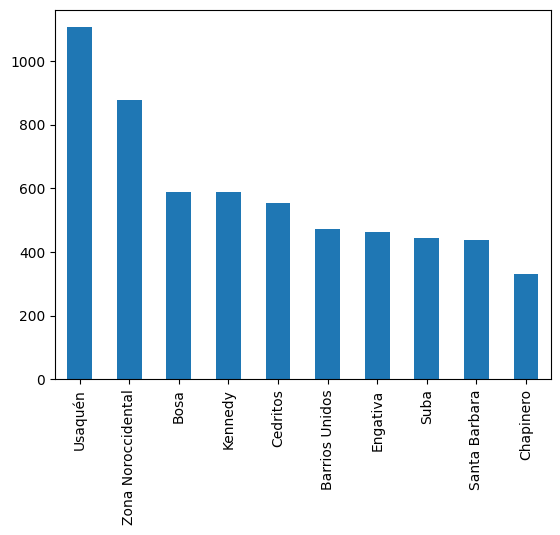

In [293]:
inmuebles_barrio = viviendas.Barrio.value_counts()
inmuebles_barrio.head(10).plot.bar()

#### Propiedades más costosas

In [294]:
costos = viviendas_4['Valor'].value_counts()
top_10_least_customers = costos.tail(10)

costo = pd.DataFrame(top_10_least_customers)
costo

,Valor
$ 806.000.000,1
$ 679.000.000,1
$ 1.193.390.000,1
$ 592.500.000,1
$ 206.000.000,1
$ 1.499.999.000,1
$ 531.000.000,1
$ 2.755.500.000,1
$ 5.250.000.000,1
$ 144.990.000,1


In [295]:
type(viviendas_4.Valor[0])

str

In [296]:
viviendas_4['Valor'][0].split()

['$', '360.000.000']

In [297]:
#Se separa el simbolo $ y se tiene una casilla con de ´precio' que sigue siendo str
valor = viviendas_4.Valor.str.split(expand=True)
viviendas_4['Moneda'] = valor[0]
viviendas_4['Precio'] = valor[1]
viviendas_4.sample(3)

,Tipo,Descripcion,Habitaciones,Banos,Area_m2,Barrio,UPL,Valor,Moneda,Precio
3447,Apartamento,Apartamento en venta en San Patricio,2,3,91,San Patricio,USAQUÉN: Country Club + Santa Bárbara,$ 680.000.000,$,680.000.000
7873,Apartamento,Apartamento en venta en Los Mártires,5,4,184,Los Mártires,La Sabana,$ 560.000.000,$,560.000.000
8434,Apartamento,Apartamento en venta en Santa Barbara,3,2,115,Santa Barbara,USAQUÉN: Country Club + Santa Bárbara,$ 565.000.000,$,565.000.000


In [298]:
#Sigue siendo str
viviendas_4.Precio.sum()

'360.000.000670.000.0001.120.000.000890.000.000970.000.000510.000.000500.000.0002.350.000.000850.000.000642.000.000652.000.000168.000.000205.000.000300.000.000680.000.0002.519.000.000420.000.000620.000.000239.000.0001.600.000.000420.000.000625.000.0002.799.000.0001.450.000.0002.000.000.000670.000.0001.800.000.000469.000.000580.000.000445.000.000261.500.000278.000.000258.000.000520.000.000200.000.000129.000.000350.000.000290.500.000750.000.000495.000.000285.000.000900.000.0001.800.000.000990.000.000418.000.000349.000.000565.000.000370.000.000259.000.000310.000.000354.000.000372.000.000500.000.000420.000.0001.050.000.000185.000.000349.000.000515.000.000287.000.000265.000.000500.000.000261.500.000300.000.000278.000.000258.000.000520.000.000350.000.000290.500.000129.000.000200.000.000750.000.000418.000.000495.000.000349.000.000310.000.000565.000.000370.000.000259.000.000354.000.000285.000.000420.000.000372.000.000500.000.000185.000.0001.050.000.000349.000.0001.800.000.000900.000.000990.000

In [299]:
viviendas_4['Precio'] = viviendas_4['Precio'].str.replace('.','',regex=True)

In [300]:
viviendas_4['Precio'] = viviendas_4.Precio.astype('float')/1000000

In [301]:
viviendas.sample(3)

,Tipo,Descripcion,Habitaciones,Banos,Area_m2,Barrio,UPL,Valor,Moneda,Precio
1677,Apartamento,Apartamento en venta en Usaquén,1,1,56,Usaquén,Usaquén,$ 360.000.000,$,360.0
2746,Apartamento,Apartamento en venta en Los Rosales,3,3,122,Los Rosales,CHAPINERO: Chicó Lago + El Refugio,$ 650.000.000,$,650.0
5537,Apartamento,Apartamento en venta en Usaquén,2,3,122,Usaquén,Usaquén,$ 890.000.000,$,890.0


In [302]:
average_barrio = viviendas_4.groupby(['UPL', 'Barrio'])['Precio']

top_10_precio = average_barrio.nlargest(10).head(10)

top_10_precio

UPL           Barrio        
Arborizadora  Madelena  3383    780.0
                        3591    780.0
                        4837    650.0
                        2739    480.0
                        3642    480.0
                        5262    480.0
                        8002    410.0
                        2740    350.0
                        5263    350.0
                        2460    280.0
Name: Precio, dtype: float64

### Agregar valor del área por M2

In [303]:
viviendas_4

,Tipo,Descripcion,Habitaciones,Banos,Area_m2,Barrio,UPL,Valor,Moneda,Precio
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,$,360.00
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000,$,670.00
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000,$,1120.00
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000,$,890.00
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000,$,970.00
...,...,...,...,...,...,...,...,...,...,...
9515,Apartamento,Apartamento en venta en Kennedy,3,2,70,Kennedy,Kennedy Central,$ 290.000.000,$,290.00
9516,Apartamento,Apartamento en venta en Parque Central Bavaria,2,2,100,Parque Central Bavaria,SANTA FE: Las Nieves + Sagrado Corazón,$ 670.000.000,$,670.00
9517,Local,Local en venta en Restrepo,8,6,383,Restrepo,Restrepo,$ 900.000.000,$,900.00
9518,Casa,Casa en venta en Engativa,3,2,183,Engativa,Engativá,$ 335.000.000,$,335.00


In [304]:
#Conocer el m2 por todas las viviendas
viviendas_4['Valor_m2'] = round(viviendas_4['Precio']/viviendas_4['Area_m2'],3)
viviendas_4.head(10)

,Tipo,Descripcion,Habitaciones,Banos,Area_m2,Barrio,UPL,Valor,Moneda,Precio,Valor_m2
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,$,360.0,5.143
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000,$,670.0,3.941
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000,$,1120.0,7.778
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000,$,890.0,5.779
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000,$,970.0,7.578
5,Apartamento,Apartamento en venta en Bella Suiza,1,2,62,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 510.000.000,$,510.0,8.226
6,Apartamento,Apartamento en venta en Bella Suiza,1,2,62,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 500.000.000,$,500.0,8.065
7,Apartamento,Apartamento en venta en Bella Suiza,3,4,212,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 2.350.000.000,$,2350.0,11.085
8,Apartamento,Apartamento en venta en El Chicó,3,2,159,El Chicó,CHAPINERO: Chicó Lago + El Refugio,$ 850.000.000,$,850.0,5.346
9,Apartamento,Apartamento en venta en Bella Suiza,2,2,80,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 642.000.000,$,642.0,8.025


In [305]:
neighbor_data = viviendas_4.groupby(['Barrio', 'UPL']).mean().sort_values(by='Valor_m2', ascending=False)
neighbor_data


<ipython-input-305-b112bcaf4185>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  neighbor_data = viviendas_4.groupby(['Barrio', 'UPL']).mean().sort_values(by='Valor_m2', ascending=False)


,,Habitaciones,Banos,Area_m2,Precio,Valor_m2
Barrio,UPL,,,,,
El Virrey,Comuneros,2.000,2.666667,93.833333,931.666667,10.201833
Santa Ana,Usaquén,3.625,4.375000,309.375000,3172.500000,9.363875
La Merced,SANTA FE: Las Nieves + Sagrado Corazón,1.000,1.500000,41.000000,359.500000,8.977000
Chico Norte,CHAPINERO: Chicó Lago + El Refugio,2.220,2.550000,129.750000,1083.912173,8.537750
Los Rosales,CHAPINERO: Chicó Lago + El Refugio,2.700,3.160000,180.250000,1479.646510,8.173770
...,...,...,...,...,...,...
Santa Librada,Localidad Usme resto,7.000,5.000000,328.000000,632.500000,1.952000
Las Ferias,ENGATIVÁ: Santa Cecilia + Jardín Botánico,11.000,6.000000,320.000000,550.000000,1.719000
Libertador,Bosa Occidental,4.500,4.000000,642.000000,1020.000000,1.662000


In [306]:
top_neighbor = viviendas_4['Barrio'].value_counts()[:10].index
top_neighbor

Index(['Usaquén', 'Zona Noroccidental', 'Bosa', 'Kennedy', 'Cedritos',
       'Barrios Unidos', 'Engativa', 'Suba', 'Santa Barbara', 'Chapinero'],
      dtype='object')

In [307]:
neighbor_data.reset_index(inplace=True)
neighbor_data

,Barrio,UPL,Habitaciones,Banos,Area_m2,Precio,Valor_m2
0,El Virrey,Comuneros,2.000,2.666667,93.833333,931.666667,10.201833
1,Santa Ana,Usaquén,3.625,4.375000,309.375000,3172.500000,9.363875
2,La Merced,SANTA FE: Las Nieves + Sagrado Corazón,1.000,1.500000,41.000000,359.500000,8.977000
3,Chico Norte,CHAPINERO: Chicó Lago + El Refugio,2.220,2.550000,129.750000,1083.912173,8.537750
4,Los Rosales,CHAPINERO: Chicó Lago + El Refugio,2.700,3.160000,180.250000,1479.646510,8.173770
...,...,...,...,...,...,...,...
144,Santa Librada,Localidad Usme resto,7.000,5.000000,328.000000,632.500000,1.952000
145,Las Ferias,ENGATIVÁ: Santa Cecilia + Jardín Botánico,11.000,6.000000,320.000000,550.000000,1.719000
146,Libertador,Bosa Occidental,4.500,4.000000,642.000000,1020.000000,1.662000
147,Roma,Timiza,8.000,3.000000,260.000000,350.000000,1.346000


In [308]:
neighbor_data.query('Barrio in @top_neighbor')

,Barrio,UPL,Habitaciones,Banos,Area_m2,Precio,Valor_m2
9,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,2.686747,2.750000,244.722892,1120.876305,7.427822
34,Santa Barbara,USAQUÉN: Country Club + Santa Bárbara,2.449772,2.652968,124.869863,730.816902,6.168637
39,Usaquén,Usaquén,2.813575,2.754751,134.046154,758.108928,5.732166
54,Cedritos,Usaquén,2.631769,2.433213,96.951264,487.414681,5.150209
73,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,3.167617,2.513113,135.785633,620.813069,4.617098
76,Suba,Suba,3.379233,2.713318,139.085779,601.368036,4.516318
82,Barrios Unidos,Los Andes,3.224101,2.528541,185.621564,549.424445,4.377615
105,Engativa,Engativá,3.627706,2.331169,129.454545,373.834910,3.886792
111,Kennedy,Kennedy Central,3.651952,2.093379,104.371817,353.079200,3.612345
133,Bosa,Bosa Central,2.959253,1.339559,59.217317,158.574806,2.808757


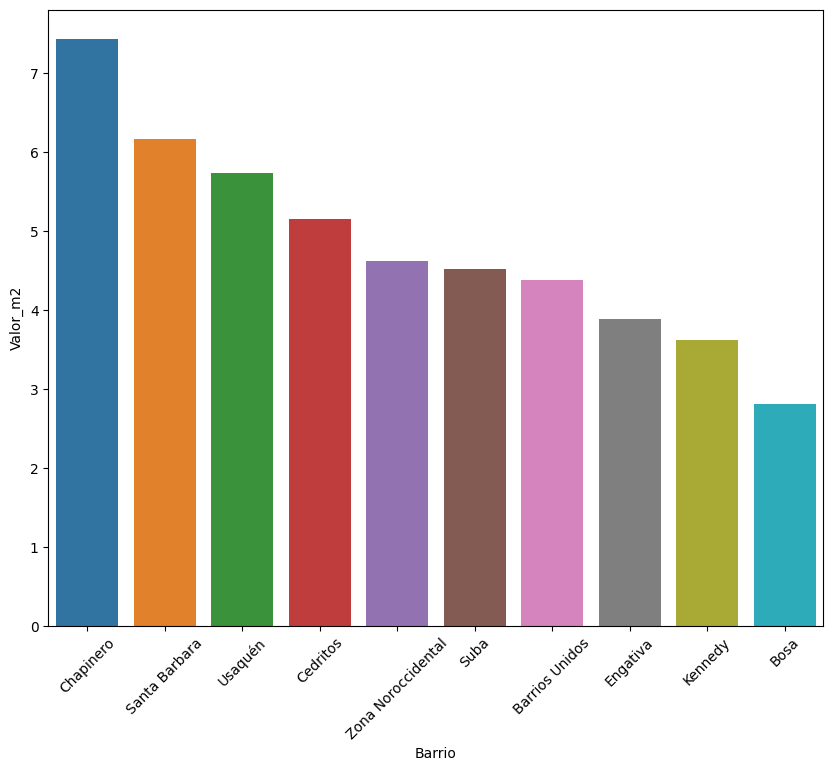

In [309]:
plt.figure(figsize=(10,8))
ax = sns.barplot(x="Barrio", y="Valor_m2", data = neighbor_data.query('Barrio in @top_neighbor'))
ax.tick_params(axis='x', rotation=45)
plt.show()

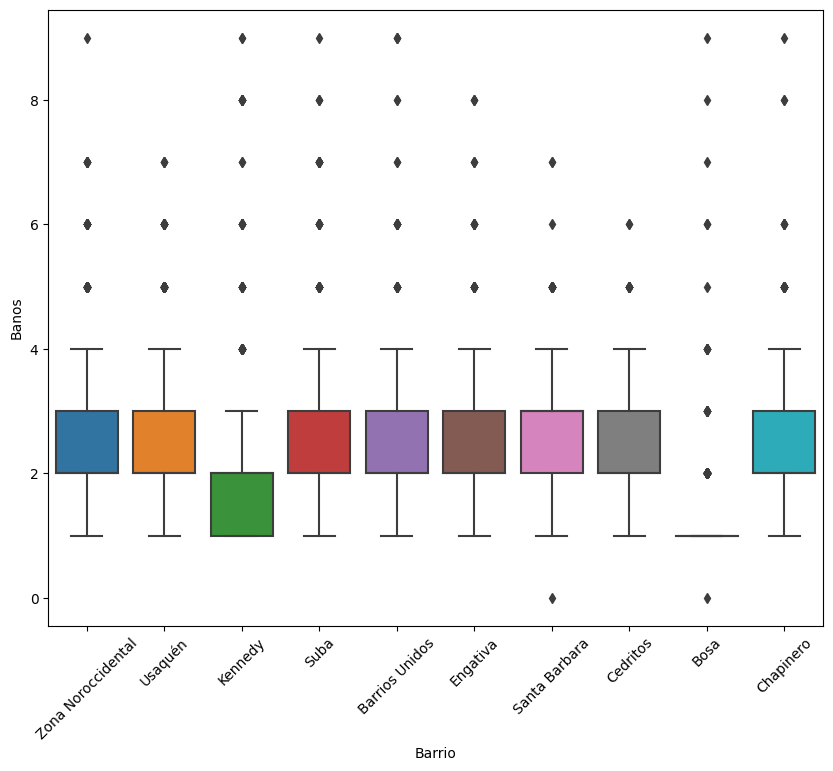

In [310]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(x="Barrio", y="Banos", data = viviendas_4.query('Barrio in @top_neighbor & Valor_m2 < 15'))
ax.tick_params(axis='x', rotation=45)
plt.show()

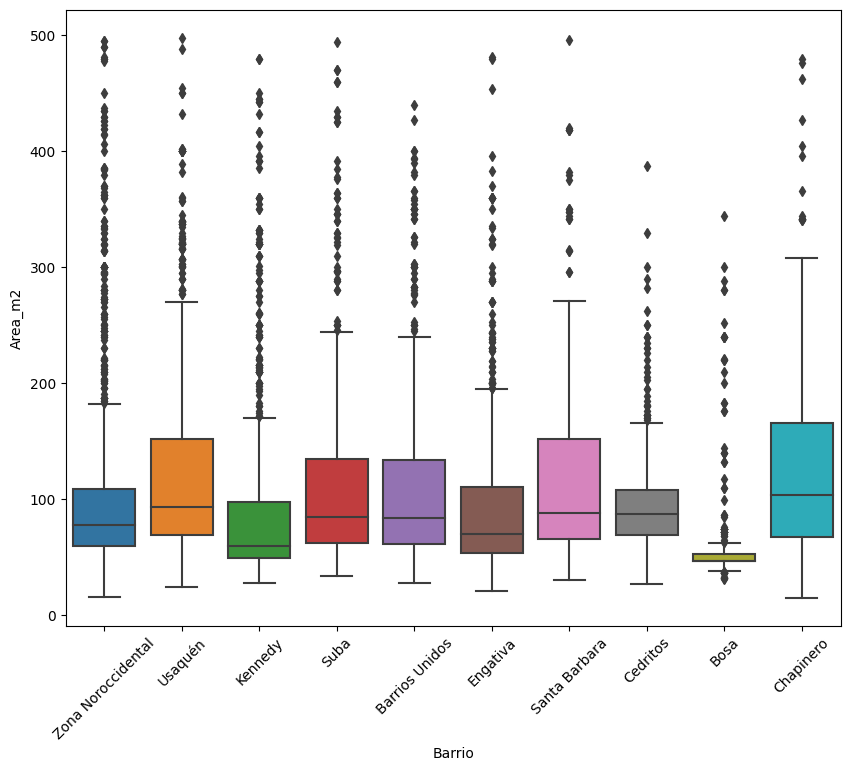

In [311]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(x="Barrio", y="Area_m2", data = viviendas_4.query('Barrio in @top_neighbor & Area_m2 < 500'))
ax.tick_params(axis='x', rotation=45)
plt.show()

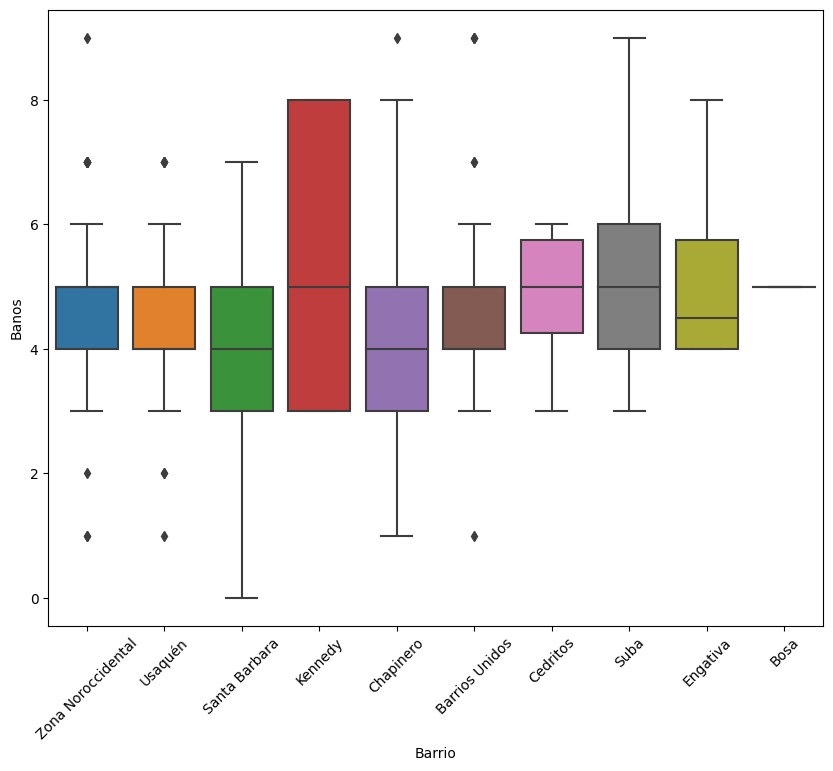

In [312]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(x="Barrio", y="Banos", data = viviendas_4.query('Barrio in @top_neighbor & Precio > 1200'))
ax.tick_params(axis='x', rotation=45)
plt.show()

### Viviendas caras

In [313]:
# Supongamos que 'viviendas_4' es tu DataFrame
# Asumiendo que tienes columnas 'Barrio', 'UPL' (o 'UPZ') y 'Precio' en el DataFrame

# Ordena el DataFrame por 'Precio' en orden descendente
viviendas_ordenadas = viviendas_4.sort_values(by='Precio', ascending=False)

# Agrupa por 'Barrio' y selecciona los 10 primeros registros con los precios más altos en cada barrio
top_10_barrios_caros = viviendas_ordenadas.groupby('Barrio').head(20)

top_expensive = pd.DataFrame(top_10_barrios_caros[['Barrio', 'UPL',
                                               'Precio']]).head(10)

top_expensive

,Barrio,UPL,Precio
5234,Usaquén,Usaquén,16000.0
1783,El Chicó,CHAPINERO: Chicó Lago + El Refugio,13200.0
8498,La Candelaria,La Candelaria,10451.5
8693,La Candelaria,La Candelaria,10451.5
2910,Santa Barbara,USAQUÉN: Country Club + Santa Bárbara,9200.0
1103,Santa Ana,Usaquén,8800.0
1301,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,8550.0
4985,Los Rosales,CHAPINERO: Chicó Lago + El Refugio,8358.0
5718,Usaquén,Usaquén,7500.0
5729,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,7200.0


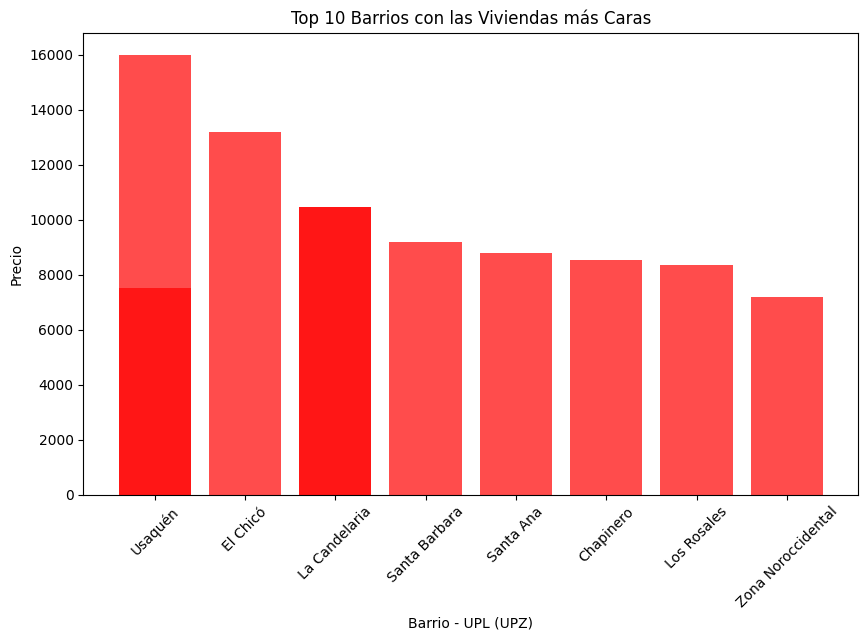

In [314]:
# Crea un gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(top_expensive['Barrio'], top_expensive['Precio'], color='r', alpha=0.7)
plt.xlabel('Barrio - UPL (UPZ)')
plt.ylabel('Precio')
plt.title('Top 10 Barrios con las Viviendas más Caras')
plt.xticks(rotation=45)
plt.show()

In [315]:
#Todas las caracteristicas
characteristic_exp = top_10_barrios_caros[['Barrio', 'UPL',
                                               'Precio', 'Banos',
                                               'Descripcion','Area_m2',
                                               'Tipo', 'Habitaciones','Valor_m2']].head(10)
characteristic_exp

,Barrio,UPL,Precio,Banos,Descripcion,Area_m2,Tipo,Habitaciones,Valor_m2
5234,Usaquén,Usaquén,16000.0,7,Edificio en venta en Usaquén,1664,Edificio,12,9.615
1783,El Chicó,CHAPINERO: Chicó Lago + El Refugio,13200.0,5,Apartamento en venta en El Chicó,1550,Apartamento,3,8.516
8498,La Candelaria,La Candelaria,10451.5,3,Apartamento en venta en La Candelaria,443,Apartamento,3,23.593
8693,La Candelaria,La Candelaria,10451.5,3,Apartamento en venta en La Candelaria,443,Apartamento,3,23.593
2910,Santa Barbara,USAQUÉN: Country Club + Santa Bárbara,9200.0,0,Edificio en venta en Santa Barbara,1080,Edificio,22,8.519
1103,Santa Ana,Usaquén,8800.0,6,Casa en venta en Santa Ana,674,Casa,4,13.056
1301,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,8550.0,5,Apartamento en venta en Chapinero,476,Apartamento,3,17.962
4985,Los Rosales,CHAPINERO: Chicó Lago + El Refugio,8358.0,5,Apartamento en venta en Los Rosales,381,Apartamento,3,21.937
5718,Usaquén,Usaquén,7500.0,6,Apartamento en venta en Usaquén,540,Apartamento,4,13.889
5729,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,7200.0,7,Apartamento en venta en Zona Noroccidental,550,Apartamento,4,13.091


In [316]:
import plotly.express as px

<Axes: xlabel='Banos', ylabel='Habitaciones'>

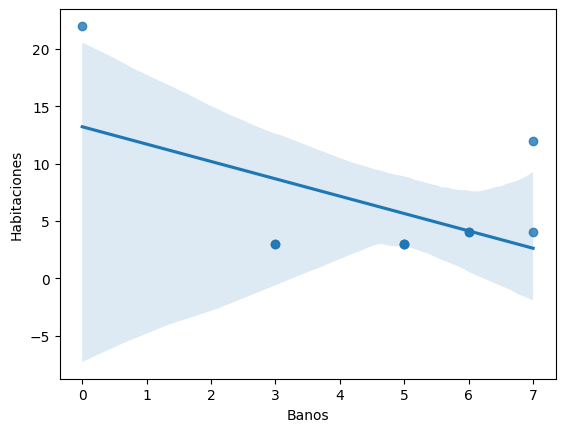

In [317]:
sns.regplot(x=characteristic_exp["Banos"], y=characteristic_exp["Habitaciones"])

## Correlación

In [341]:
characteristic_exp

,Barrio,UPL,Precio,Banos,Descripcion,Area_m2,Tipo,Habitaciones,Valor_m2
5234,Usaquén,Usaquén,16000.0,7,Edificio en venta en Usaquén,1664,Edificio,12,9.615
1783,El Chicó,CHAPINERO: Chicó Lago + El Refugio,13200.0,5,Apartamento en venta en El Chicó,1550,Apartamento,3,8.516
8498,La Candelaria,La Candelaria,10451.5,3,Apartamento en venta en La Candelaria,443,Apartamento,3,23.593
8693,La Candelaria,La Candelaria,10451.5,3,Apartamento en venta en La Candelaria,443,Apartamento,3,23.593
2910,Santa Barbara,USAQUÉN: Country Club + Santa Bárbara,9200.0,0,Edificio en venta en Santa Barbara,1080,Edificio,22,8.519
1103,Santa Ana,Usaquén,8800.0,6,Casa en venta en Santa Ana,674,Casa,4,13.056
1301,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,8550.0,5,Apartamento en venta en Chapinero,476,Apartamento,3,17.962
4985,Los Rosales,CHAPINERO: Chicó Lago + El Refugio,8358.0,5,Apartamento en venta en Los Rosales,381,Apartamento,3,21.937
5718,Usaquén,Usaquén,7500.0,6,Apartamento en venta en Usaquén,540,Apartamento,4,13.889
5729,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,7200.0,7,Apartamento en venta en Zona Noroccidental,550,Apartamento,4,13.091


In [318]:
#Correlación casas caras
corrmat_exp = characteristic_exp.corr()
corrmat_exp

<ipython-input-318-522572588206>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat_exp = characteristic_exp.corr()


,Precio,Banos,Area_m2,Habitaciones,Valor_m2
Precio,1.000000,0.090108,0.820200,0.216140,-0.305236
Banos,0.090108,1.000000,0.086908,-0.525591,-0.158011
Area_m2,0.820200,0.086908,1.000000,0.487203,-0.781716
Habitaciones,0.216140,-0.525591,0.487203,1.000000,-0.559189
Valor_m2,-0.305236,-0.158011,-0.781716,-0.559189,1.000000


In [319]:
k=10

In [320]:
cols_exp = corrmat_exp.nlargest(k,'Precio')['Precio'].index
cols_exp

Index(['Precio', 'Area_m2', 'Habitaciones', 'Banos', 'Valor_m2'], dtype='object')

In [321]:
cm_exp = np.corrcoef(characteristic_exp[cols_exp].values.T)
cm_exp

array([[ 1.        ,  0.82020046,  0.21613986,  0.09010753, -0.30523614],
       [ 0.82020046,  1.        ,  0.48720349,  0.08690822, -0.78171641],
       [ 0.21613986,  0.48720349,  1.        , -0.52559098, -0.55918938],
       [ 0.09010753,  0.08690822, -0.52559098,  1.        , -0.15801055],
       [-0.30523614, -0.78171641, -0.55918938, -0.15801055,  1.        ]])

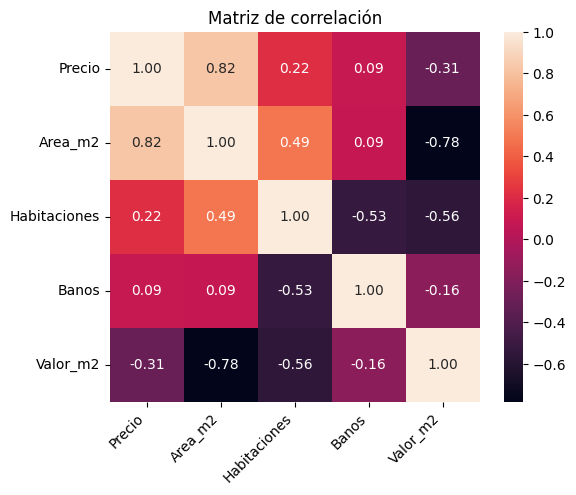

In [322]:
hm_exp = sns.heatmap(cm_exp, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels=cols_exp.values, xticklabels=cols_exp.values)
plt.title('Matriz de correlación')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, ha='right', fontsize=10)
plt.show()

Acá podemos ver que hay más relación del precio con el área y de últimas se dejan los baños.

### Viviendas baratas

In [323]:
# Supongamos que 'viviendas_4' es tu DataFrame
# Asumiendo que tienes columnas 'Barrio', 'UPL' (o 'UPZ') y 'Precio' en el DataFrame

# Ordena el DataFrame por 'Precio' en orden descendente
viviendas_ordenadas = viviendas_4.sort_values(by='Precio', ascending=False)

# Agrupa por 'Barrio' y selecciona los 10 primeros registros con los precios más altos en cada barrio
top_10_barrios_baratos = viviendas_ordenadas.groupby('Barrio').head(20)

top_cheap = pd.DataFrame(top_10_barrios_baratos[['Barrio', 'UPL',
                                               'Precio', 'Banos',
                                               'Descripcion','Area_m2']]).tail(5)

top_cheap

,Barrio,UPL,Precio,Banos,Descripcion,Area_m2
415,Bogotá D.C,Ciudad Salitre Occidental,124.0,1,Apartamento en venta en Bogotá D.C,47
447,Bogotá D.C,Ciudad Salitre Occidental,117.0,1,Apartamento en venta en Bogotá D.C,43
7136,San Diego,SANTA FE: Las Nieves + Sagrado Corazón,105.0,1,Apartamento en venta en San Diego,36
4887,Las Aguas,La Candelaria,90.0,1,Oficina/Consultorio en venta en Las Aguas,25
2464,Las Aguas,La Candelaria,90.0,1,Oficina/Consultorio en venta en Las Aguas,25


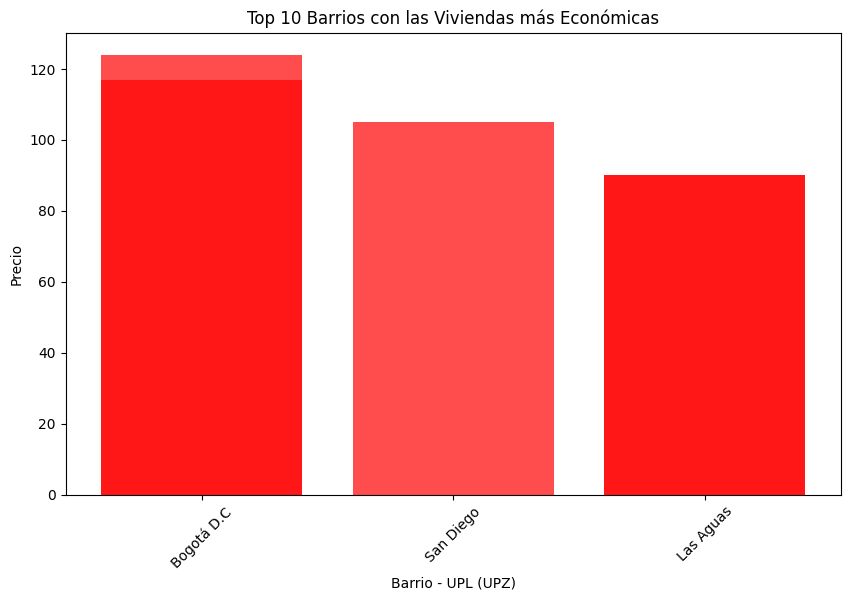

In [324]:
# Crea un gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(top_cheap['Barrio'], top_cheap['Precio'], color='r', alpha=0.7)
plt.xlabel('Barrio - UPL (UPZ)')
plt.ylabel('Precio')
plt.title('Top 10 Barrios con las Viviendas más Económicas')
plt.xticks(rotation=45)
plt.show()

In [333]:
#Todas las caracteristicas
characteristic_cheap = top_10_barrios_baratos[['Barrio', 'UPL',
                                               'Precio', 'Banos',
                                               'Descripcion','Area_m2',
                                               'Tipo', 'Habitaciones','Valor_m2']].head(5)
characteristic_cheap

,Barrio,UPL,Precio,Banos,Descripcion,Area_m2,Tipo,Habitaciones,Valor_m2
5234,Usaquén,Usaquén,16000.0,7,Edificio en venta en Usaquén,1664,Edificio,12,9.615
1783,El Chicó,CHAPINERO: Chicó Lago + El Refugio,13200.0,5,Apartamento en venta en El Chicó,1550,Apartamento,3,8.516
8498,La Candelaria,La Candelaria,10451.5,3,Apartamento en venta en La Candelaria,443,Apartamento,3,23.593
8693,La Candelaria,La Candelaria,10451.5,3,Apartamento en venta en La Candelaria,443,Apartamento,3,23.593
2910,Santa Barbara,USAQUÉN: Country Club + Santa Bárbara,9200.0,0,Edificio en venta en Santa Barbara,1080,Edificio,22,8.519


<Axes: xlabel='Banos', ylabel='Habitaciones'>

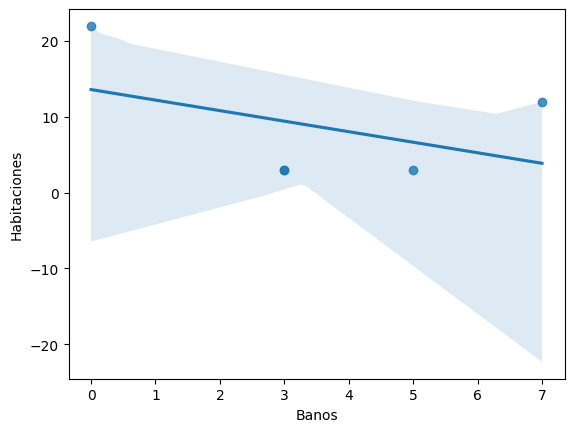

In [334]:
sns.regplot(x=characteristic_cheap["Banos"], y=characteristic_cheap["Habitaciones"])

### Correlación casas baratas

In [335]:
corrmat_cheap = characteristic_cheap.corr()
corrmat_cheap

<ipython-input-335-331fe44e3adb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat_cheap = characteristic_cheap.corr()


,Precio,Banos,Area_m2,Habitaciones,Valor_m2
Precio,1.000000,0.953169,0.757274,-0.143803,-0.429466
Banos,0.953169,1.000000,0.559548,-0.429173,-0.170689
Area_m2,0.757274,0.559548,1.000000,0.328972,-0.912137
Habitaciones,-0.143803,-0.429173,0.328972,1.000000,-0.605718
Valor_m2,-0.429466,-0.170689,-0.912137,-0.605718,1.000000


In [336]:
k_c = 10

In [337]:
cols_cheap = corrmat_exp.nlargest(k_c,'Precio')['Precio'].index
cols_cheap

Index(['Precio', 'Area_m2', 'Habitaciones', 'Banos', 'Valor_m2'], dtype='object')

In [338]:
cm_cheap = np.corrcoef(characteristic_cheap[cols_cheap].values.T)
cm_cheap

array([[ 1.        ,  0.75727358, -0.14380273,  0.95316852, -0.42946582],
       [ 0.75727358,  1.        ,  0.32897168,  0.55954828, -0.91213693],
       [-0.14380273,  0.32897168,  1.        , -0.42917319, -0.60571796],
       [ 0.95316852,  0.55954828, -0.42917319,  1.        , -0.17068901],
       [-0.42946582, -0.91213693, -0.60571796, -0.17068901,  1.        ]])

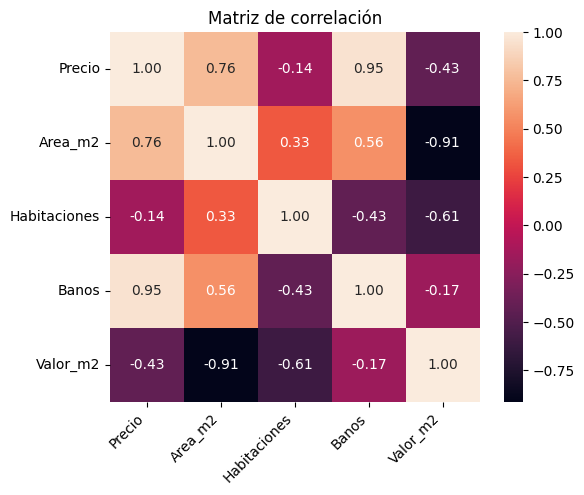

In [339]:
hm_cheap = sns.heatmap(cm_cheap, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels=cols_cheap.values, xticklabels=cols_cheap.values)
plt.title('Matriz de correlación')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, ha='right', fontsize=10)
plt.show()

Acá podemos ver que hay una relación del precio con el número de baños, muy diferente que las casas caras que son relación con el área.

<Axes: xlabel='Precio', ylabel='Banos'>

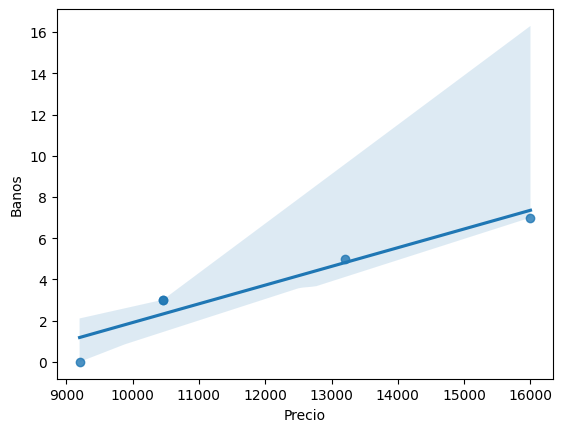

In [340]:
sns.regplot(x=characteristic_cheap["Precio"], y=characteristic_cheap["Banos"])

## Modelamiento

In [358]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = viviendas_4[['Precio']]
y = viviendas_4['Area_m2']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=9)

In [359]:
X_train

,Precio
3753,182.0
8017,155.0
4832,420.0
5843,275.0
9484,541.9
...,...
6200,426.0
501,245.0
6782,300.0
4444,1200.0


In [360]:
X_test

,Precio
5397,1300.0
7723,3500.0
3110,565.0
2648,1650.0
4514,630.0
...,...
4109,163.5
7808,130.0
5819,330.0
5562,280.0


In [361]:
y_train

3753     49
8017     55
4832     54
5843     37
9484     77
       ... 
6200     94
501      59
6782     68
4444    390
8574     63
Name: Area_m2, Length: 6664, dtype: int64

In [362]:
modelo = LinearRegression()

In [363]:
modelo.fit(X_train,y_train)

LinearRegression()

In [364]:
y_predict_test = modelo.predict(X_test)

In [365]:
y_predict_test

array([248.45740853, 550.80828845, 147.44472819, ..., 115.14815693,
       108.27654602,  91.78467985])

In [366]:
from sklearn.metrics import mean_absolute_error, r2_score

baseline_mae = mean_absolute_error(y_test, y_predict_test)
baseline_r2 = r2_score(y_test, y_predict_test)
print('mae:', baseline_mae, 'r2:',baseline_r2)

mae: 71.57476483803607 r2: 0.06962468890828899


Mean Absolute Error (MAE):

El MAE mide el error promedio entre las predicciones del modelo y los valores reales. Por lo general, cuanto más bajo sea el MAE, mejor será el rendimiento del modelo.
El rango del MAE depende de la escala de los datos. Por ejemplo, si estás trabajando con precios de viviendas en miles de dólares, un MAE de 1000 podría ser aceptable, mientras que si estás trabajando con temperaturas en grados Celsius, un MAE de 2 grados podría ser inaceptable.
No existe un rango universalmente válido, pero puedes comparar el MAE de tu modelo con un "modelo base" simple para evaluar si tu modelo está haciendo un trabajo significativamente mejor que una predicción ingenua.
R-squared (R^2):

R^2 varía entre 0 y 1. Un valor más cercano a 1 indica que el modelo explica bien la variabilidad de los datos, mientras que un valor más cercano a 0 significa que el modelo no explica la variabilidad.
No hay un rango específico universal para R^2, pero a menudo se considera que un R^2 mayor que 0.5 o 0.7 indica un buen ajuste del modelo a los datos.
Sin embargo, el valor deseado también depende del contexto. Un R^2 de 0.7 podría ser excelente en algunos casos, mientras que en otros casos podría ser insatisfactorio.

La interpretación de estos valores sería la siguiente:

El MAE de aproximadamente 71.57 indica que, en promedio, las predicciones de tu modelo están a unos 71.57 unidades de distancia de los valores reales. El MAE es relativamente alto, lo que sugiere que las predicciones pueden estar bastante alejadas de los valores reales en tu conjunto de datos.

El R^2 de aproximadamente 0.0696 indica que tu modelo explica una pequeña parte de la variabilidad en los datos. En este caso, el modelo no se ajusta bien a los datos y no puede explicar la mayoría de la variabilidad en las observaciones.

En resumen, basándonos en estos valores de métricas, el modelo actual parece tener un rendimiento limitado. Es posible que sea necesario considerar otras estrategias, como mejorar el modelo, seleccionar características más relevantes o explorar diferentes algoritmos de aprendizaje automático para obtener un mejor rendimiento en la predicción.

In [377]:
X = viviendas_4[['Habitaciones','Banos']]

y = viviendas_4["Precio"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 9)
modelo_1 = LinearRegression()
modelo_1.fit(X_train, y_train)
y_predict_test = modelo_1.predict(X_test)
y_predict_train = modelo_1.predict(X_train)
mae_test = mean_absolute_error(y_test, y_predict_test)
r2_test = r2_score(y_test, y_predict_test)
mae_train = mean_absolute_error(y_train, y_predict_train)
r2_train = r2_score(y_train, y_predict_train)
print('mae_test:',mae_test,'r2_test:',r2_test)
print('mae_train:',mae_train,'mae_train:',r2_train)

mae_test: 265.1820415358952 r2_test: 0.3285778949680186
mae_train: 274.69219327868296 mae_train: 0.358984272311079


In [388]:
X = viviendas_4[['Habitaciones','Banos','Area_m2']]

y = viviendas_4["Precio"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 9)
modelo_1 = LinearRegression()
modelo_1.fit(X_train, y_train)
y_predict_test = modelo_1.predict(X_test)
y_predict_train = modelo_1.predict(X_train)
mae_test = mean_absolute_error(y_test, y_predict_test)
r2_test = r2_score(y_test, y_predict_test)
mae_train = mean_absolute_error(y_train, y_predict_train)
r2_train = r2_score(y_train, y_predict_train)
print('mae_test:',mae_test,'r2_test:',r2_test)
print('mae_train:',mae_train,'mae_train:',r2_train)

mae_test: 264.9588015318626 r2_test: 0.32941408071111045
mae_train: 274.614375060854 mae_train: 0.3593064874008226


No hay mucha variabilidad con el primer modelo y el segundo al agregarle el Area_2

In [392]:
#Valor de una vivienda con estas caracteristicas
modelo_1.predict([[1,2,221]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([475.44998293])